<a href="https://colab.research.google.com/github/jumbokh/csu1101-ML-Class/blob/main/notebooks/update_Cifar10_CNNa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Keras] 使用 CNN 建立 Cifar-10 的分類器 (實戰篇)
#### https://clay-atlas.com/blog/2019/10/03/python-chinese-tutorial-keras-cnn-cifar10/

In [27]:
!pip install keras.utils
!pip install graphViz
!pip install pydot==1.2.4

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
!tar -xzvf /app/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/app/My Drive': Input/output error
cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [30]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [31]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))

In [32]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)        

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 21s 32ms/step - loss: 1.6315 - accuracy: 0.3961 - val_loss: 1.2644 - val_accuracy: 0.5360
Epoch 2/10
625/625 [==============================] - 20s 31ms/step - loss: 1.1442 - accuracy: 0.5889 - val_loss: 0.9860 - val_accuracy: 0.6462
Epoch 3/10
625/625 [==============================] - 20s 31ms/step - loss: 0.9332 - accuracy: 0.6703 - val_loss: 0.8669 - val_accuracy: 0.6983
Epoch 4/10
625/625 [==============================] - 20s 31ms/step - loss: 0.7936 - accuracy: 0.7206 - val_loss: 0.7631 - val_accuracy: 0.7294
Epoch 5/10
625/625 [==============================] - 20s 31ms/step - loss: 0.7053 - accuracy: 0.7513 - val_loss: 0.6886 - val_accuracy: 0.7587
Epoch 6/10
625/625 [==============================] - 21s 33ms/step - loss: 0.6307 - accuracy: 0.7766 - val_loss: 0.6590 - val_accuracy: 0.7701
Epoch 7/10
625/625 [==============================] - 20s 31ms/step - loss: 0.5660 - accuracy: 0.8015 - val_loss: 0.6527 - val_accuracy:

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss:', loss)
print('Accuracy:', accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.6489 - accuracy: 0.7792
Test:
Loss: 0.6489009857177734
Accuracy: 0.77920001745224


In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

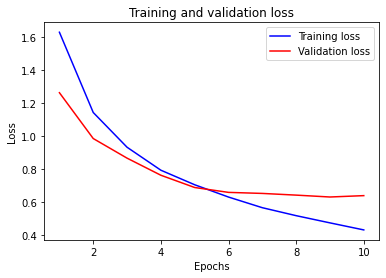

In [36]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
valacc = history.history['val_accuracy']
valloss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, valloss, 'r', label='Validation loss')
# b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [37]:
print(accuracy)

0.77920001745224


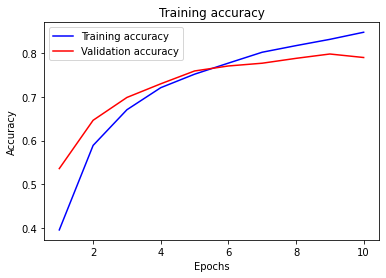

In [38]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
valacc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, valacc_values, 'r', label='Validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()